In [6]:
import h5py


# Open the HDF5 file
with h5py.File("../data/electron_density_profiles_2023.h5", "r") as f:
    # Access datasets    
    electron_density_2023 = f["electron_density"][:]
    latitude = f["latitude"][:]
    longitude = f["longitude"][:]
    altitude = f["altitude"][:]
    local_time = f["local_time"][:]
    f107 = f["F10.7"][:]
    kp = f["Kp"][:]

    # Access metadata
    description = f.attrs["description"]
    num_profiles = f.attrs["num_profiles"]

print(f"Loaded {num_profiles} profiles: {description}")

Loaded 201024 profiles: Ionospheric electron density profiles from COSMIC-2 2023 from


In [13]:
import h5py


# Open the HDF5 file
with h5py.File("../data/electron_density_profiles_2024.h5", "r") as f:
    # Access datasets    
    electron_density_2024 = f["electron_density"][:]
    latitude = f["latitude"][:]
    longitude = f["longitude"][:]
    altitude = f["altitude"][:]
    local_time = f["local_time"][:]
    f107 = f["F10.7"][:]
    kp = f["Kp"][:]

    # Access metadata
    description = f.attrs["description"]
    num_profiles = f.attrs["num_profiles"]

print(f"Loaded {num_profiles} profiles: {description}")

Loaded 175621 profiles: Ionospheric electron density profiles from COSMIC-2 2024 from


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
local_time_new = pd.to_datetime(local_time, unit='s')

In [9]:
local_time_new

DatetimeIndex(['2023-01-01 03:15:49.748748064',
               '2023-01-01 15:03:39.631598949',
               '2023-01-02 05:17:02.199651003',
               '2022-12-31 17:28:48.445048094',
               '2022-12-31 22:49:39.591856003',
               '2023-01-02 02:36:26.792622089',
               '2022-12-31 20:27:58.198080063',
               '2023-01-01 05:50:13.535053968',
               '2023-01-01 02:30:31.965403080',
               '2023-01-01 01:36:56.936243057',
               ...
               '2023-12-31 20:09:04.940181971',
               '2023-12-31 22:11:17.104701042',
               '2023-12-31 11:01:33.220809937',
               '2023-12-31 02:54:22.370559931',
               '2023-12-31 09:34:46.839485884',
               '2023-12-31 05:50:11.437901974',
               '2023-12-31 20:34:40.410650015',
               '2024-01-01 07:50:00.074304104',
               '2023-12-31 05:26:49.800658941',
               '2023-12-31 14:17:59.454467058'],
              dtype=

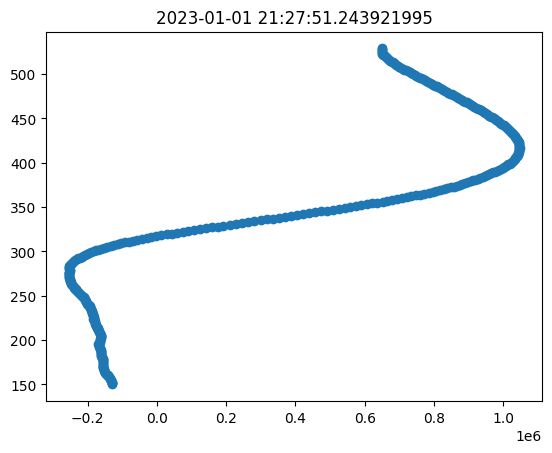

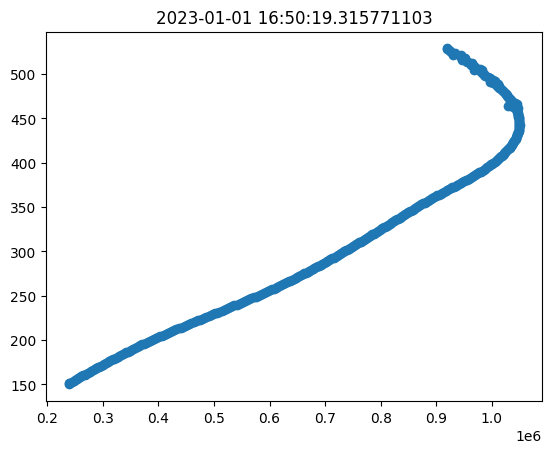

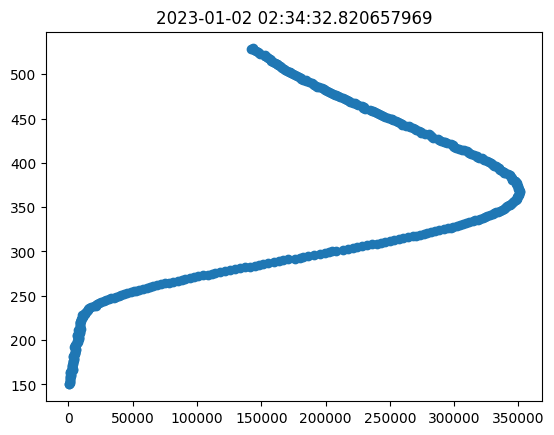

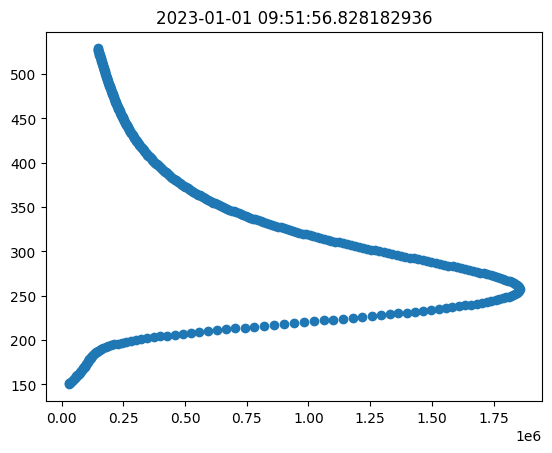

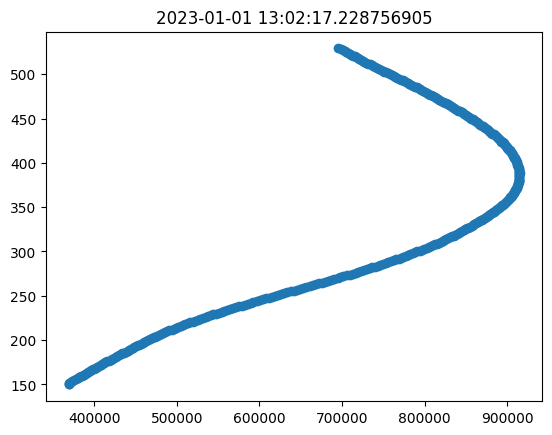

In [12]:
for i in range(10, 15):

    plt.figure()
    plt.scatter(electron_density_2023[i], altitude)
    plt.title(local_time_new[i])
    plt.show()

In [15]:
negative_percentage_per_altitude_2023

array([2.24779131e+01, 2.24500557e+01, 2.23848894e+01, 2.22873886e+01,
       2.21993394e+01, 2.21122851e+01, 2.20316977e+01, 2.19391714e+01,
       2.18506248e+01, 2.17944126e+01, 2.17063634e+01, 2.16128422e+01,
       2.15412090e+01, 2.14730579e+01, 2.13700852e+01, 2.12770614e+01,
       2.12049308e+01, 2.11213586e+01, 2.10417662e+01, 2.09387934e+01,
       2.08323384e+01, 2.07527459e+01, 2.06641993e+01, 2.05865966e+01,
       2.04821315e+01, 2.03940823e+01, 2.02851401e+01, 2.02040552e+01,
       2.01179959e+01, 2.00319365e+01, 1.99274713e+01, 1.98120622e+01,
       1.96817295e+01, 1.95563714e+01, 1.94225565e+01, 1.92907315e+01,
       1.91564191e+01, 1.90101679e+01, 1.88390441e+01, 1.86728948e+01,
       1.85072429e+01, 1.83331344e+01, 1.81331582e+01, 1.79620344e+01,
       1.77819564e+01, 1.75655643e+01, 1.73655882e+01, 1.71700891e+01,
       1.69233524e+01, 1.66960164e+01, 1.64661931e+01, 1.62254258e+01,
       1.60030643e+01, 1.57473734e+01, 1.55021291e+01, 1.52220630e+01,
      

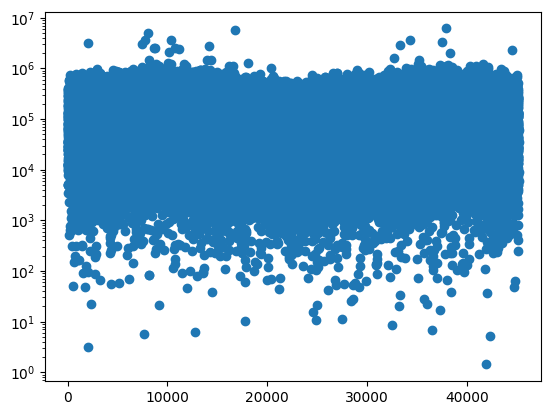

In [47]:
temp = electron_density_2023[:, 0] < 0
plt.semilogy(range(np.sum(temp)), -electron_density_2023[temp, 0], 'o')

In [43]:
np.sum(temp)

np.int64(45186)

In [44]:
electron_density_2023[temp, 0]

array([ -28691.27929688, -220753.140625  , -254206.359375  , ...,
        -60379.98046875,   -5901.55566406,  -35025.02734375],
      shape=(45186,))

In [38]:
temp

array([ True, False, False, ..., False, False, False], shape=(201024,))

Total percentage of negative values: 4.41%


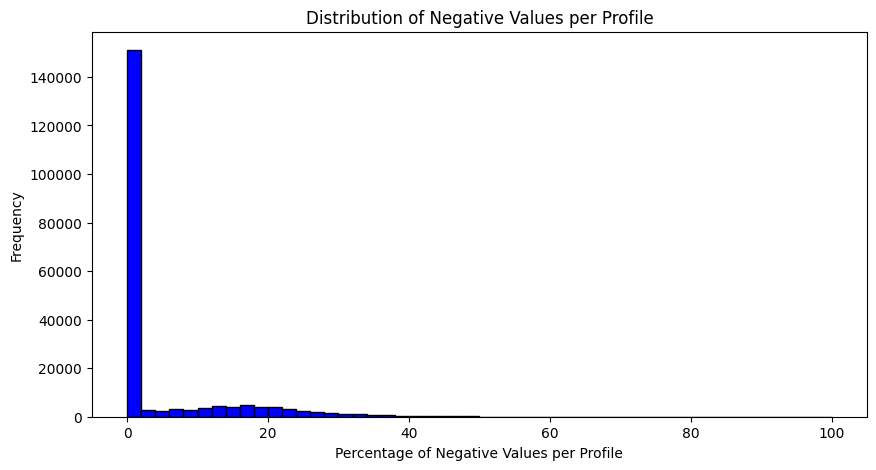

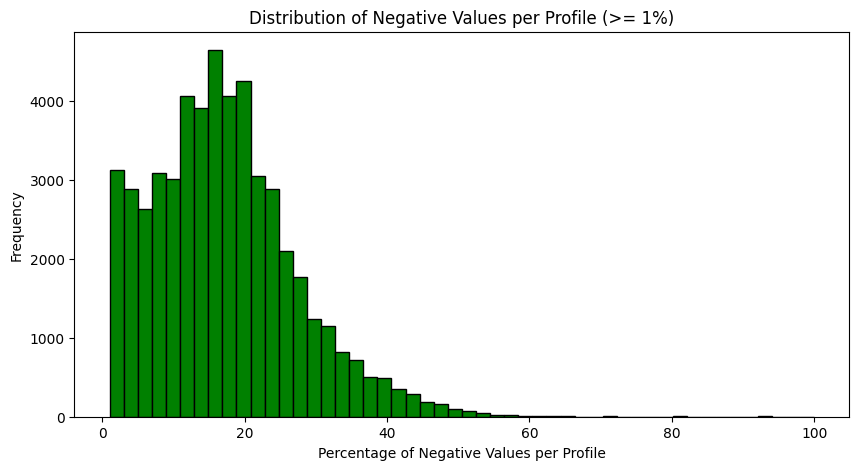

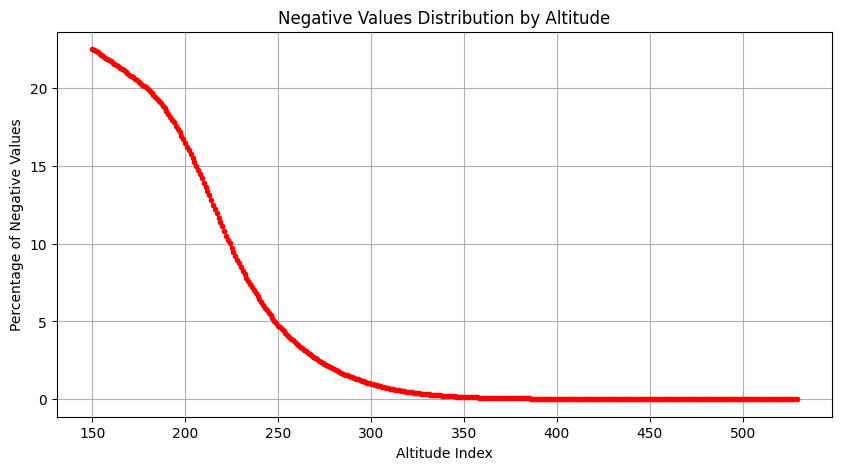

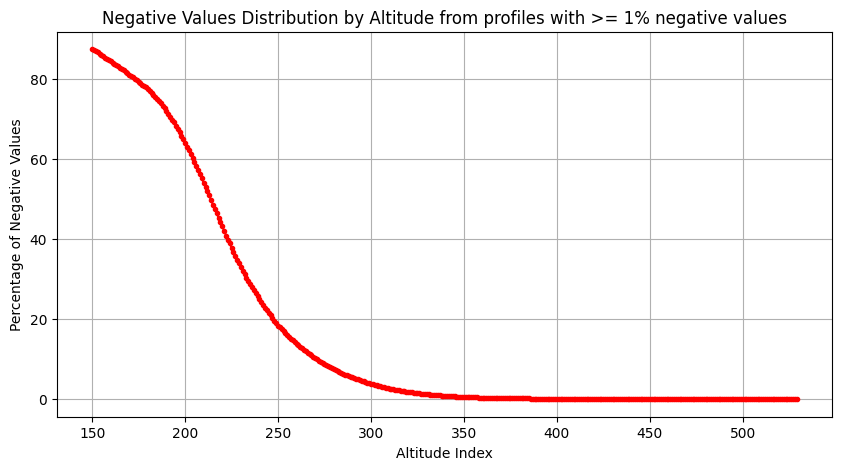

In [16]:
negative_mask = electron_density_2023 < 0
percent_negative_per_profile = np.sum(negative_mask, axis=1) / electron_density_2023.shape[1] * 100
total_negative_percentage = np.sum(negative_mask) / np.prod(electron_density_2023.shape) * 100

print(f"Total percentage of negative values: {total_negative_percentage:.2f}%")
plt.figure(figsize=(10, 5))
plt.hist(percent_negative_per_profile, bins=50, color='blue', edgecolor='black')
plt.xlabel('Percentage of Negative Values per Profile')
plt.ylabel('Frequency')
plt.title('Distribution of Negative Values per Profile')
plt.show()

# Filter out profiles with less than 1% negative values
filtered_percent_negative = percent_negative_per_profile[percent_negative_per_profile >= 1]

plt.figure(figsize=(10, 5))
plt.hist(filtered_percent_negative, bins=50, color='green', edgecolor='black')
plt.xlabel('Percentage of Negative Values per Profile')
plt.ylabel('Frequency')
plt.title('Distribution of Negative Values per Profile (>= 1%)')
plt.show()

# Plot altitude-wise analysis
negative_percentage_per_altitude_2023 = np.sum(negative_mask, axis=0) / electron_density_2023.shape[0] * 100

plt.figure(figsize=(10, 5))
plt.plot(altitude, negative_percentage_per_altitude_2023, color='red', marker='.')
plt.xlabel('Altitude Index')
plt.ylabel('Percentage of Negative Values')
plt.title('Negative Values Distribution by Altitude')
plt.grid(True)
plt.show()

negative_percentage_per_altitude_2023_2 = np.sum(negative_mask, axis=0) / filtered_percent_negative.shape[0] * 100

plt.figure(figsize=(10, 5))
plt.plot(altitude, negative_percentage_per_altitude_2023_2, color='red', marker='.')
plt.xlabel('Altitude Index')
plt.ylabel('Percentage of Negative Values')
plt.title('Negative Values Distribution by Altitude from profiles with >= 1% negative values')
plt.grid(True)
plt.show()

Total percentage of negative values: 4.64%


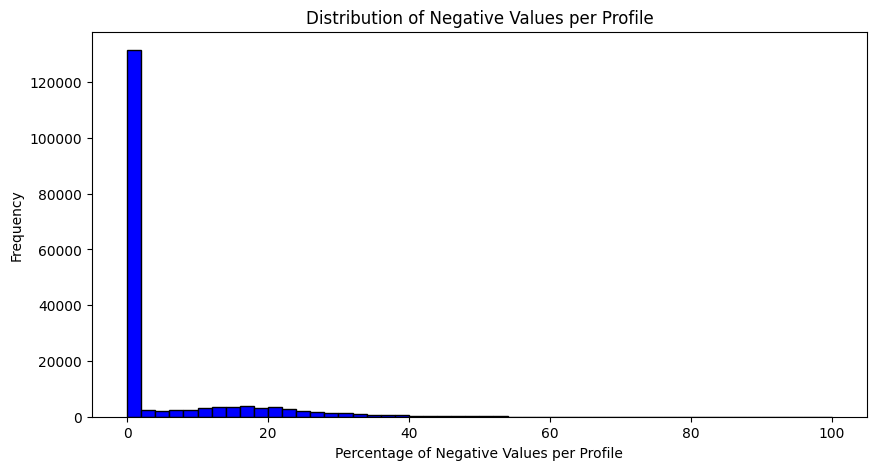

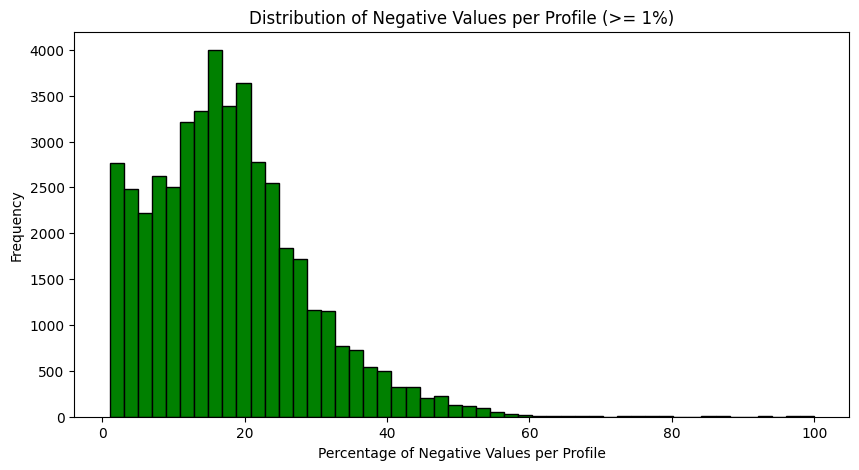

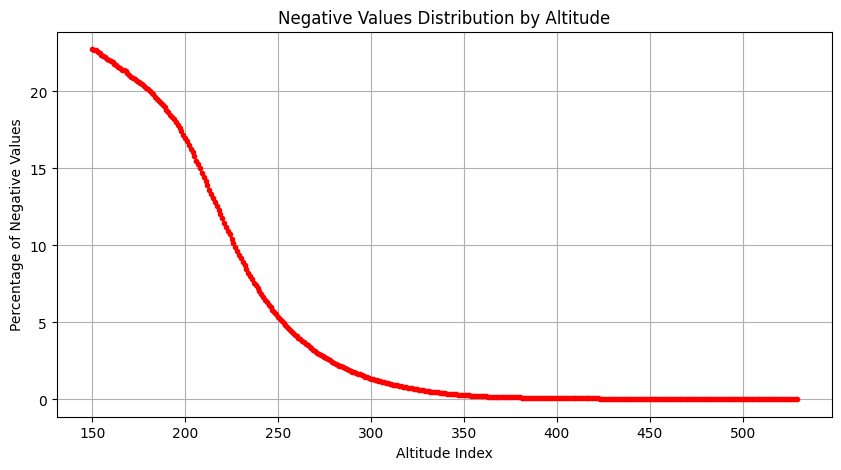

In [18]:
negative_mask = electron_density_2024 < 0
percent_negative_per_profile = np.sum(negative_mask, axis=1) / electron_density_2024.shape[1] * 100
total_negative_percentage = np.sum(negative_mask) / np.prod(electron_density_2024.shape) * 100

print(f"Total percentage of negative values: {total_negative_percentage:.2f}%")
plt.figure(figsize=(10, 5))
plt.hist(percent_negative_per_profile, bins=50, color='blue', edgecolor='black')
plt.xlabel('Percentage of Negative Values per Profile')
plt.ylabel('Frequency')
plt.title('Distribution of Negative Values per Profile')
plt.show()

# Filter out profiles with less than 1% negative values
filtered_percent_negative = percent_negative_per_profile[percent_negative_per_profile >= 1]

plt.figure(figsize=(10, 5))
plt.hist(filtered_percent_negative, bins=50, color='green', edgecolor='black')
plt.xlabel('Percentage of Negative Values per Profile')
plt.ylabel('Frequency')
plt.title('Distribution of Negative Values per Profile (>= 1%)')
plt.show()

# Plot altitude-wise analysis
negative_percentage_per_altitude_2024 = np.sum(negative_mask, axis=0) / electron_density_2024.shape[0] * 100

plt.figure(figsize=(10, 5))
plt.plot(altitude, negative_percentage_per_altitude_2024, color='red', marker='.')
plt.xlabel('Altitude Index')
plt.ylabel('Percentage of Negative Values')
plt.title('Negative Values Distribution by Altitude')
plt.grid(True)
plt.show()

In [19]:
delta = negative_percentage_per_altitude_2023 - negative_percentage_per_altitude_2024

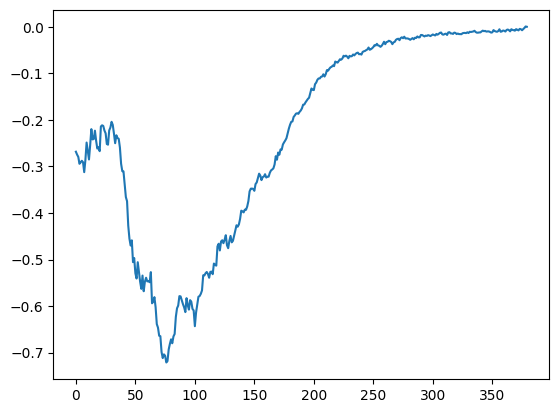

In [23]:
plt.plot(delta)